In [1]:
import os
import sys 
import glob 


import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import keras as K 

Using TensorFlow backend.


In [3]:
sys.path.append('../py_modules/') 
from utils import read_h5py_file, cm_to_cvae_trim

In [4]:
cm_files = sorted(glob.glob('../../*_traj/contacts/contacts-*.h5')) 

The residue list is as follows:

`42-58
72-74
79-85
92-100
104-114
117-128`

In [5]:
AA_list = np.hstack([np.arange(41, 58), np.arange(71,74), np.arange(78,85), 
          np.arange(91,100), np.arange(103,114), np.arange(116,128)])

In [17]:
def cm_generator(cm_files, batch_size, resnum, shuffle=True): 
    samples_per_epoch = len(cm_files) 
    number_of_batches = samples_per_epoch/batch_size 
    counter = 0 
    if shuffle: 
        np.random.shuffle(cm_files)
    
    while 1: 
        cm_file_list = cm_files[batch_size*counter:batch_size*(counter+1)] 
        cm_data_lists = [read_h5py_file(cm_file) for cm_file in cm_file_list]
        cvae_input = cm_to_cvae_trim(cm_data_lists, resnum) 

        counter += 1 
        yield cvae_input, cvae_input 
        
        # Reset counter to next epoch 
#         if counter >= number_of_batches: 
#             counter = 0 

In [13]:
cm_gen = cm_generator(cm_files, 3, AA_list) 
cm_test = next(cm_gen)

In [14]:
for i in cm_test: 
    print(i.shape)  
    break 

(60, 60, 1)


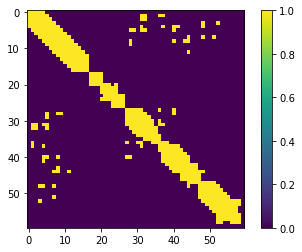

In [18]:
plt.imshow(i.reshape(i.shape[:2])) 
plt.colorbar()

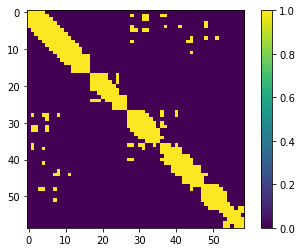

In [77]:
plt.imshow(tcm.reshape(len(AA_list), len(AA_list))) 
plt.colorbar()

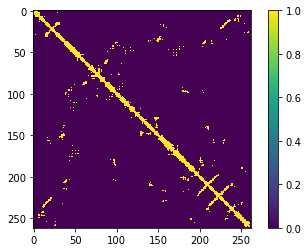

In [65]:
plt.imshow(i.reshape(i.shape[:2])) 
plt.colorbar()